In [10]:
#visualizing protostellar disks data from protostellar disk catalog

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import math

#from sort_functions import sort_spectral_class 
#from sort_functions import b, c
#from sort_functions import a
import importlib
from functions import sort_functions
importlib.reload(sort_functions)

from astropy import units as u
from astropy.coordinates import SkyCoord
from mw_plot import MWPlot

circumstellar_disks = pd.read_csv("data/circumstellardisks.csv")
data = pd.DataFrame(circumstellar_disks)
print(data )

                     Object Category Spec_Type R_band_mag  Distance_pc  \
0    2MASSI J1628137-243139       TT       NaN       17.7       140.00   
1                    49 Cet   Debris        A1        5.6        59.00   
2                    61 Vir   Debris       G7V        4.2         8.50   
3                    99 Her   Debris     F7+K4        4.7        15.60   
4      [MR81] H alpha 17 NE       TT       M2e       16.9       150.00   
5                    AA Tau       TT        M0       11.8       140.00   
6                    AB Aur      HAe       A0e        7.1       144.00   
7                 alpha CrB   Debris      A0 V        2.2        23.00   
8                  AS 205 A       TT        K0       12.8       128.00   
9                  AS 205 B       TT     K7+M0         14       128.00   
10                   AS 209       TT        K5       10.4       121.00   
11                   ASR 41       TT       NaN        NaN       316.00   
12                   AU Mic   Debris  

In [2]:
print("Total number of protostellar disk objects: " + str(len(data)))

Total number of protostellar disk objects: 253


In [3]:
prot_disk_cat = data.Category.unique() #unique types of protostellar disks
print("Categories of Protostellar Disk: " + str(prot_disk_cat) + "\n")
print("Counts of Unique Categories:")
print(data['Category'].value_counts())
#Count Missing Values
missing_cat = 0
for index, row in data.iterrows():
    category_str = row['Category']
    if (isinstance(category_str, float)):
        missing_cat += 1
        #print(str(row['Object']) + " " + str(category_str) + " " + "Spectral Class Data missing")
print("Number of missing Categories: " + str(missing_cat))
#Make it properly

Categories of Protostellar Disk: ['TT' 'Debris' 'HAe' 'YSO?' 'YSO' 'Trans' 'HBe' nan 'PPN' 'UC' 'wTT']

Counts of Unique Categories:
Debris    96
TT        72
UC        37
YSO       22
HAe       17
Trans      3
YSO?       1
wTT        1
HBe        1
PPN        1
Name: Category, dtype: int64
Number of missing Categories: 2


In [4]:
#TODO: Attach visualization of what each Disk Means

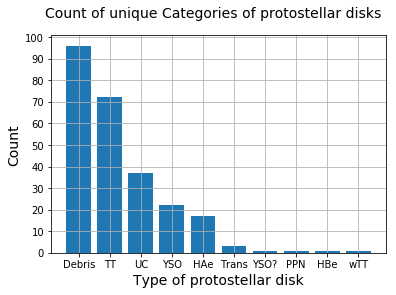

In [5]:
types = ["Debris", "TT", "UC", "YSO", "HAe", "Trans","YSO?", "PPN","HBe", "wTT"]
fig = plt.figure()
plt.bar(types, data['Category'].value_counts())
fig.suptitle('Count of unique Categories of protostellar disks', fontsize=14)
plt.xlabel('Type of protostellar disk', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.yticks(np.arange(0, 110, step=10))
plt.grid()
plt.show()

In [6]:
a = [0]*len(object_magnitude)
fig = plt.figure(figsize=(20,10))
plt.scatter(object_magnitude['Category'], object_magnitude['Magnitude'])
plt.xticks(rotation=45, fontsize=20)
fig.suptitle('Plot of Protostellar disk R band Magnitude vs Category', 
             fontsize=24)
plt.axhline(y=4, alpha= 0.4, color='r')
plt.axhline(y=15, alpha= 0.4, color='r')
plt.xlabel('Object', fontsize=20)
plt.ylabel('R_Band_Magnitude', fontsize=20)
plt.yticks(np.arange(0, 25, step=2))
plt.grid()
plt.show()

print("Plot of the Disk Magnitudes vs Known Categories. Red lines constrain 4<R_mag<15")
print(str(len(object_magnitude['Category'])) + " Total objects plotted")

NameError: name 'object_magnitude' is not defined

In [ ]:
missing_spectral_class, spectral_bins,spectral_bins_temp,magnitude_spec_type = sort_functions.sort_mag_spec_type(data)

In [ ]:
print(str(missing_spectral_class) + " data are missing spectral classification") #
print("Count of Spectral Class:")
print(" O  B   A   F   G   K   M")
print(spectral_bins)

In [ ]:
spectral_types = ["O", "B", "A", "F", "G", "K", "M"]
fig = plt.figure()
plt.bar(spectral_types, spectral_bins)
fig.suptitle('Plot of spectral types', fontsize=14)
plt.xlabel('Spectral type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.yticks(np.arange(0, 60, step=10))
plt.grid()
plt.show()

In [ ]:
#Subdivisions for Bins
#a = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
spectral_types_bins = ["O0-3", "O4-6" ,"O7-9", "B0-3", "B4-6" ,"B7-9", 
                       "A0-3", "A4-6" ,"A7-9" , "F0-3", "F4-6" ,"F7-9", 
                       "G0-3", "G4-6" ,"G7-9" , "K0-3", "K4-6" ,"K7-9", 
                       "M0-3", "M4-6" ,"M7-9"]

fig = plt.figure(figsize=(20,10))
plt.bar(spectral_types_bins, spectral_bins_temp)
fig.suptitle('Count of spectral types with 0-9 temperature subdivisions', fontsize=14)
plt.xlabel('Spectral type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.yticks(np.arange(0, 50, step=2))
plt.grid()
plt.show()

In [7]:
missing_mag, object_magnitude = sort_functions.sort_mag(data)
print(str(missing_mag) + " Data are missing magnitude")

59 Data are missing magnitude


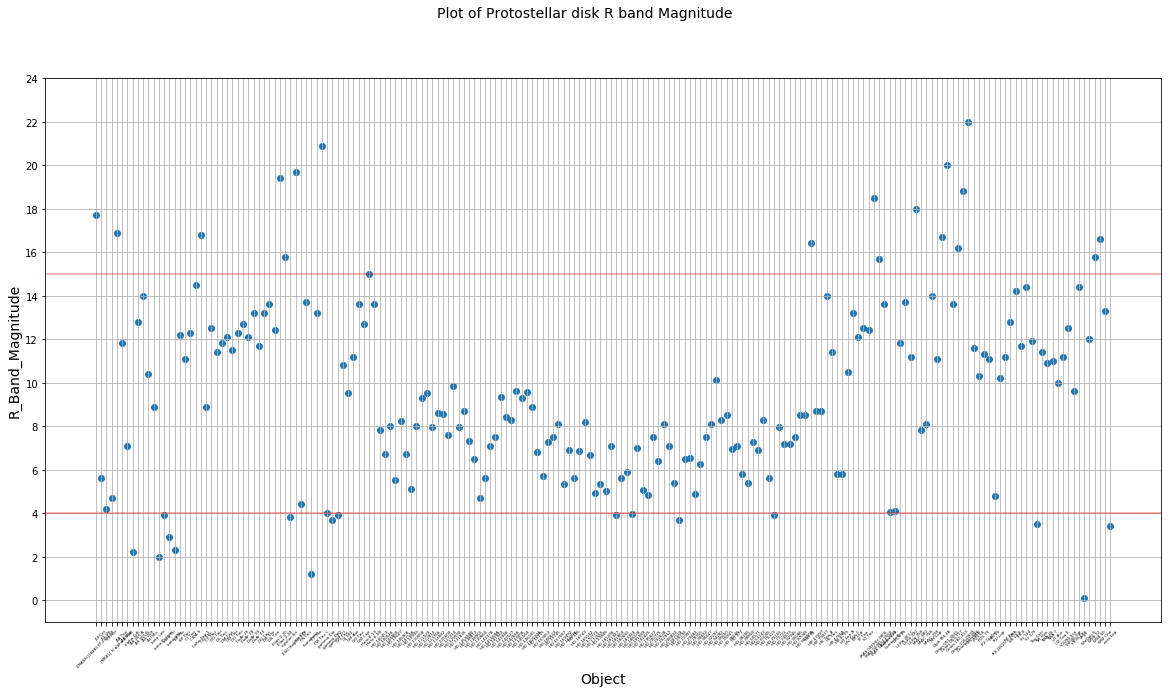

Unordered Scatter plot of the Disk Magnitudes. Red lines constrain 4<R_mag<15
194 Total objects plotted


In [8]:
a = [0]*len(object_magnitude)
fig = plt.figure(figsize=(20,10))
plt.scatter(object_magnitude['Object'], object_magnitude['Magnitude'])
plt.xticks(rotation=45, fontsize=4)
fig.suptitle('Plot of Protostellar disk R band Magnitude', fontsize=14)
plt.axhline(y=4, alpha= 0.4, color='r')
plt.axhline(y=15, alpha= 0.4, color='r')
plt.xlabel('Object', fontsize=14)
plt.ylabel('R_Band_Magnitude', fontsize=14)
plt.yticks(np.arange(0, 25, step=2))
plt.grid()
plt.show()

print("Unordered Scatter plot of the Disk Magnitudes. Red lines constrain 4<R_mag<15")
print(str(len(object_magnitude['Object'])) + " Total objects plotted")

In [11]:
#magnitude_spec_type_arrange, magnitude_spec_type_bins_arrange
magnitude_spec_type_arrange, magnitude_spec_type_bins_arrange, mean_magnitude_spec_clas = sort_functions.sort_magnitude_spec_type_arrange(magnitude_spec_type, spectral_types , spectral_types_bins)

NameError: name 'magnitude_spec_type' is not defined

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.scatter(magnitude_spec_type_arrange['Object'], magnitude_spec_type_arrange['Magnitude'])
plt.xticks(rotation=45, fontsize=4)
fig.suptitle('Plot of Protostellar Disk R band Magnitude vs Spectral Class', fontsize=24)
plt.axhline(y=4, alpha= 0.4, color='r')
plt.axhline(y=15, alpha= 0.4, color='r')

colour_spectrum = ['blue', 'lightblue', 'white', 'wheat' ,'yellow' ,'orange','red']
c = 1

for i in range(1, len(magnitude_spec_type_arrange)):#goes thrrough all the data
    if(i == 1):
        plt.axvline(x=i-1, alpha= 0.4, color=colour_spectrum[1]) #light blue
        plt.text(i-1, 1, magnitude_spec_type_arrange['Spec_Type'][i][0],
                 color='black', 
                 fontsize = 18)
        c += 1
    #if the letter now is not equal to the letter before
    elif(magnitude_spec_type_arrange['Spec_Type'][i][0] != magnitude_spec_type_arrange['Spec_Type'][i-1][0]):
        plt.axvline(x=i, alpha= 10, color=colour_spectrum[c])#print on the letter now
        plt.text(i+1, 1, 
                 magnitude_spec_type_arrange['Spec_Type'][i][0], color='black', fontsize = 18)
        c += 1

#plt.axvline(x=55, alpha= 0.4, color='blue')
    
plt.xlabel('Object', fontsize=14)
plt.ylabel('R_Band_Magnitude', fontsize=14)
plt.yticks(np.arange(0, 25, step=2))
plt.grid(alpha = 0.3)
plt.show()
#it looks like I can fit a line through this

print("Unordered Scatter plot of the Disk Magnitudes. Red Lines Constrain 4<R_mag<15")
print(str(len(magnitude_spec_type_arrange['Magnitude'])) + " Total objects plotted")

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.scatter(magnitude_spec_type_bins_arrange['Object'], magnitude_spec_type_bins_arrange['Magnitude'])
plt.xticks(rotation=45, fontsize=4)
fig.suptitle('Plot of Protostellar Disk R band Magnitude vs Spectral Class sorted 0-9 Temperature', fontsize=24)
plt.axhline(y=4, alpha= 0.4, color='r')
plt.axhline(y=15, alpha= 0.4, color='r')

c = 1

for i in range(1, len(magnitude_spec_type_arrange)):#goes thrrough all the data
    if(i == 1):
        plt.axvline(x=i-1, alpha= 0.4, color=colour_spectrum[1]) #light blue
        plt.text(i-1, 1, magnitude_spec_type_arrange['Spec_Type'][i][0],
                 color='black', 
                 fontsize = 18)
        c += 1
    #if the letter now is not equal to the letter before
    elif(magnitude_spec_type_arrange['Spec_Type'][i][0] != magnitude_spec_type_arrange['Spec_Type'][i-1][0]):
        plt.axvline(x=i, alpha= 10, color=colour_spectrum[c])#print on the letter now
        plt.text(i+1, 1, 
                 magnitude_spec_type_arrange['Spec_Type'][i][0], color='black', fontsize = 18)
        c += 1

plt.axhline(y=16.70, alpha= 0.4, color='blue')
        
plt.xlabel('Object', fontsize=14)
plt.ylabel('R_Band_Magnitude', fontsize=14)
plt.yticks(np.arange(0, 25, step=2))
plt.grid(alpha = 0.4)
plt.show()
#it looks like I can fit a line through this

print("Unordered Scatter plot of the Disk Magnitudes. Red Lines Constrain 4<R_mag<15")
print(str(len(magnitude_spec_type_bins_arrange)) + " Total objects plotted")

In [ ]:
#Already you can deliver some analytics based on this. 
#How many inside the magnitude region of interest are of a certain category of disk/ the brightest dissks are of what type/Category?
#How many inside the magnitude region of interest are of a certain spectral class.

In [ ]:
#Average magnitude in a spectral class, average magnitude in spectral class

In [ ]:
#spectral_types = ["O", "B", "A", "F", "G", "K", "M"]
fig = plt.figure()
plt.bar(spectral_types, mean_magnitude_spec_clas)
fig.suptitle('Plot of Average Magnitude of spectral types', fontsize=14)
plt.xlabel('Spectral type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.yticks(np.arange(0, 20, step=2))
plt.grid()
plt.show()

In [ ]:
#Average magnitude of a Category